The objective of this case study is to use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

# Import the python libraries

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

Read the data from the provided .csv file into a pandas dataframe:

In [415]:
loan = pd.read_csv('loan.csv' , low_memory=False)
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [416]:
loan.shape

(39717, 111)

# Cleaning Data

Drop features with more than 30% data missing

In [417]:
loan[loan.columns].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [418]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [419]:
# Analysing the missing values , we noticed that many columns have 100% missing values, some have 65%, 33% etc. 
# Lets get rid of the columns having more than 30% missing values.

missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 30]
print(missing_columns)

# Dropping columns from above list
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

Analysing the Data Dictionary to determine which features would have been available to potential investors. List of features we currently have in dataframe:

In [420]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Employer Title replaces Employer Name for all loans listed after 9/23/2013 so can safely drop this column

In [421]:
loan = loan.drop(['emp_title'] , axis=1)

In [422]:
loan[loan.columns].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Columns which have only single values and so are not significant in the analysis

In [423]:
#Funtion to drop the columns with only singular values
def removesingular(df):
    for col in df.columns:
        if df[col].nunique() == 1:
            df.drop(col,inplace=True,axis=1)         

In [424]:
removesingular(loan)  

In [425]:
#Columns left in the Data Frame
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Check the description in the Data Dictionary and only keep the variables that have some significance to the investors.

In [426]:
loan = loan.drop(['id'
                  ,'member_id'
                  ,'url'
                  ,'earliest_cr_line'
                  ,'inq_last_6mths'
                  ,'out_prncp'
                  ,'out_prncp_inv'
                  ,'total_pymnt_inv'
                  ,'total_pymnt'
                  ,'total_rec_prncp'
                  ,'total_rec_int'
                  ,'total_rec_late_fee'
                  ,'collection_recovery_fee'
                  ,'recoveries'
                  ,'last_pymnt_d'
                  ,'last_pymnt_amnt'
                  ,'last_credit_pull_d'
                  ,'funded_amnt'
                  , 'funded_amnt_inv'
                  ,'delinq_2yrs'
                  ], axis=1)

In [427]:
loan.shape

(39717, 23)

In [428]:
# columns with values as null
loan.columns[(loan.isnull().sum()) > 0]

Index(['emp_length', 'title', 'revol_util', 'pub_rec_bankruptcies'], dtype='object')

In [429]:
#drop the null rows from the data frame 
loan = loan[~loan.emp_length.isnull()]
loan = loan[~loan.title.isnull()]
loan = loan[~loan.revol_util.isnull()]
loan = loan[~loan.pub_rec_bankruptcies.isnull()]

In [430]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

Lets analyse the rest of the columns 

In [431]:
loan['loan_status'].value_counts()

Fully Paid     31525
Charged Off     5265
Current         1098
Name: loan_status, dtype: int64

loan_status with 'Current' are neither fully paid not defaulted(ongoing), so let's get rid of the Fully-Paid loans. 

In [432]:
loan = loan.loc[loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [433]:
#Get the months value from field term 
loan['term']=loan['term'].apply(lambda x : x.split('months')[0])
loan['term'].value_counts()

 36     27539
 60      9251
Name: term, dtype: int64

In [434]:
loan.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
 36     0.106867
 60     0.251000
Name: loan_status, dtype: float64

In [435]:
#Get the int_rate value from field int_rate 
loan['int_rate']=loan['int_rate'].apply(lambda x : x.split('%')[0])
loan['int_rate'] = loan['int_rate'].astype('float64')

# Univariate and Segmented Univariate Analysis

In [436]:
def plot_func(colname , size):
    plt.figure(figsize=(size,5))
    sns.countplot(x=colname, hue='loan_status', order= sorted(loan[colname].unique()) , data=loan)
    plt.show()

In [437]:
def boxplot_func(colname, size):
    plt.figure(figsize=(size,5))
    sns.boxplot(x=colname, y='loan_status', data=loan)
    plt.show()

In [438]:
def display_func(colname , size):
    plt.figure(figsize=(size,5))
    sns.countplot(x=colname, order=sorted(loan[colname].unique()) , data= loan.loc[loan['loan_status'].isin(['Charged Off'])])
    plt.show()

Charged-off loans tends to have much higher interest rates. Let's compare the summary statistics by loan status:

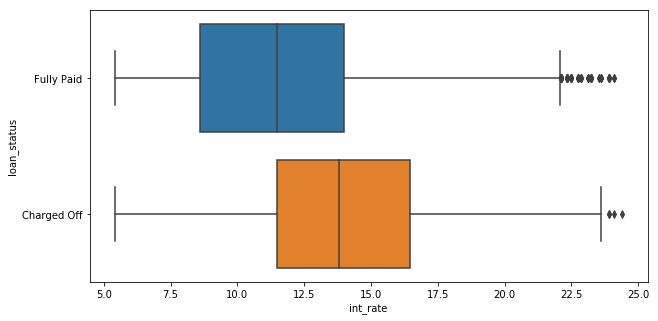

In [439]:
 # Plot with loan status
boxplot_func('int_rate' , 10)

In [440]:
loan.groupby('loan_status')['int_rate'].describe() 

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,13.924435,3.651870,5.42,11.49,13.79,16.45,24.40
Fully Paid,31525.0,11.659022,3.608944,5.42,8.59,11.49,13.99,24.11


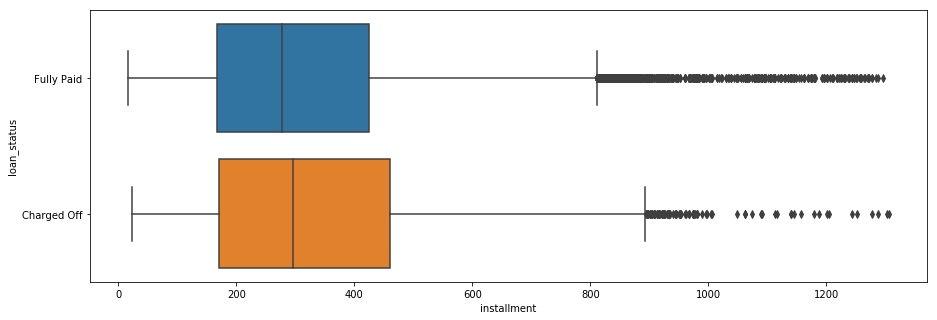

In [441]:
 # Plot with loan status
boxplot_func('installment', 15)

In [442]:
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,338.766101,216.172910,22.79,171.53,296.75,460.10,1305.19
Fully Paid,31525.0,322.616124,207.580732,16.08,167.08,278.17,424.56,1295.21


Grade B , C have comparatively more probability of Charged Off(defaulters)

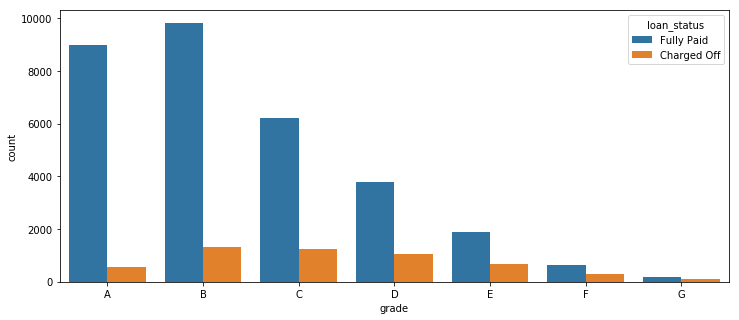

In [443]:
plot_func('grade', 12)

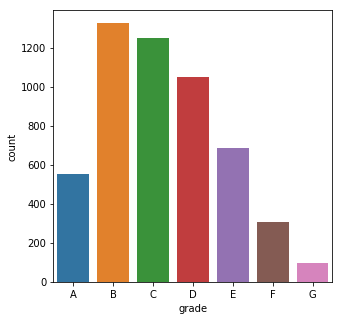

In [444]:
display_func('grade', 5)

Similar to Grade , even Sub Grade have the same trend.

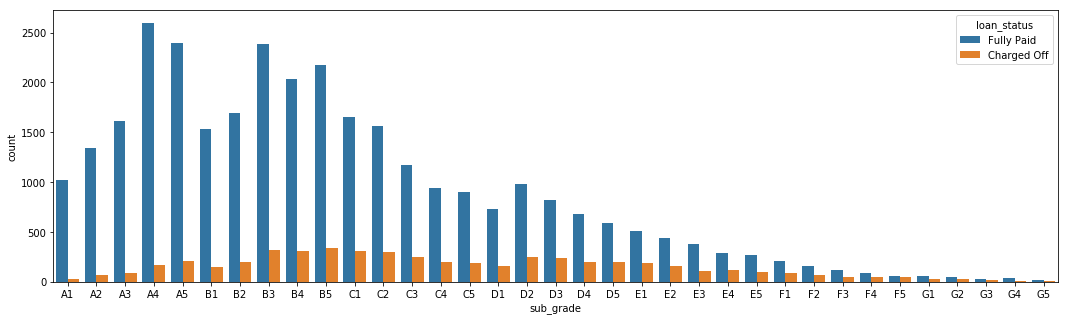

In [445]:
plot_func('sub_grade', 18)

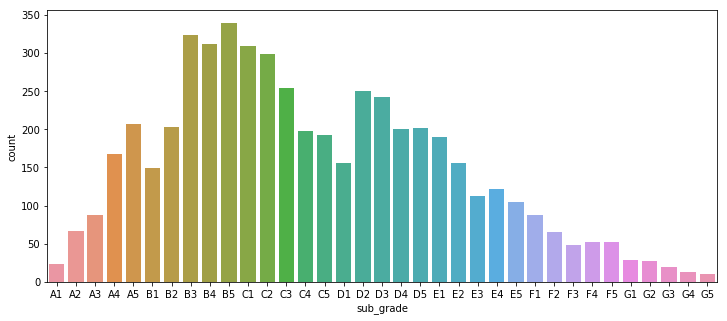

In [446]:
display_func('sub_grade', 12)

Below plot appears to be large differences in charge-off rates by home ownership status. Renters and Mortgage have a higher probability of charge-off.

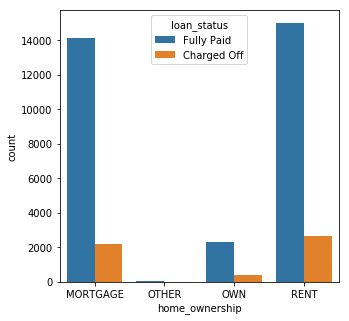

In [447]:
plot_func('home_ownership',5)

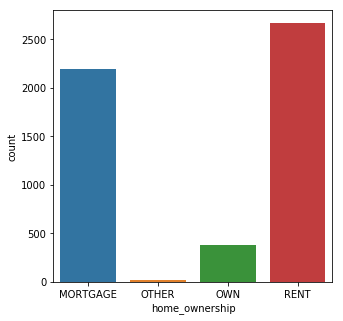

In [448]:
display_func('home_ownership', 5)

 Let's compare the charge-off rates:

In [449]:
loan.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Charged Off']

home_ownership
MORTGAGE    2196
OTHER         18
OWN          385
RENT        2666
Name: loan_status, dtype: int64

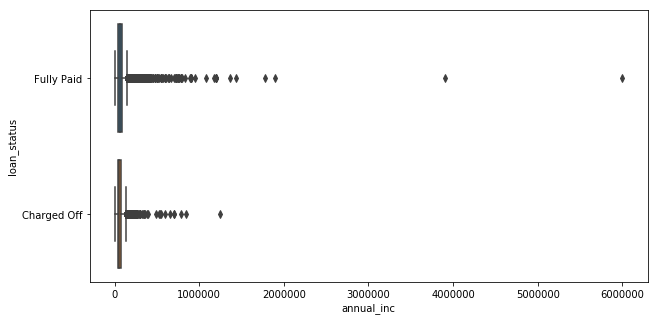

In [450]:
# Plot with loan status
boxplot_func('annual_inc' ,10)

In [451]:
loan.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,63255.799759,47715.009593,4080.0,38400.0,54000.0,75000.0,1250000.0
Fully Paid,31525.0,70471.859205,66307.972091,4000.0,42000.0,60000.0,84996.0,6000000.0


In [452]:
##Create Derived categorical variable for annual_inc 
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

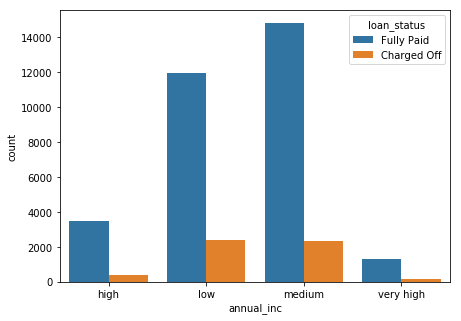

In [453]:
plot_func('annual_inc', 7)

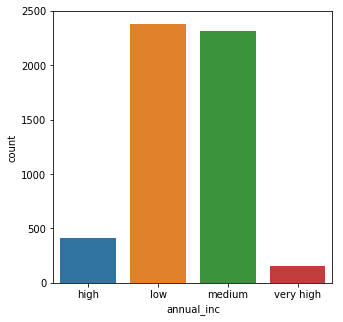

In [454]:
display_func('annual_inc' ,5)

verification_status with value as Verified seems to have more probability of getting Charged_off

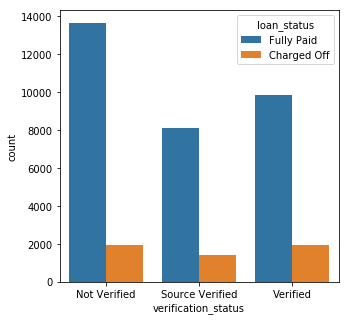

In [455]:
plot_func('verification_status',5)

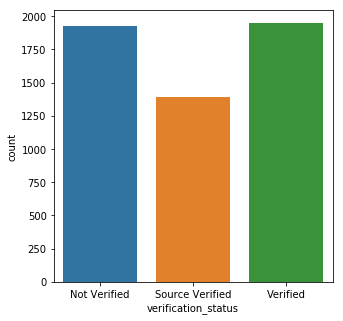

In [456]:
display_func('verification_status',5)

In [457]:
loan.groupby('verification_status')['loan_status'].value_counts().loc[:,'Charged Off']

verification_status
Not Verified       1924
Source Verified    1393
Verified           1948
Name: loan_status, dtype: int64

issue_d is for the month year in which the loan was funded

In [458]:
#get the month and year from th issue_d
loan.issue_d  = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_d_month'] = loan['issue_d'].dt.month 
loan['issue_d_year'] = loan['issue_d'].dt.year

2011 is the year with most loans for both Fully Paid and Charged Off. So this variable is not significant different for Charged Off.

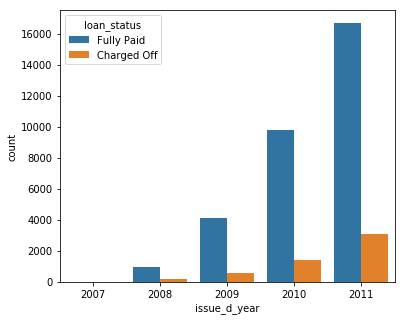

In [459]:
plot_func('issue_d_year', 6)

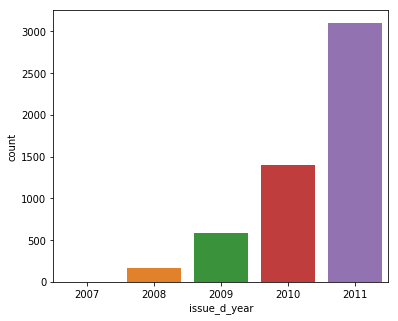

In [460]:
display_func('issue_d_year',6)

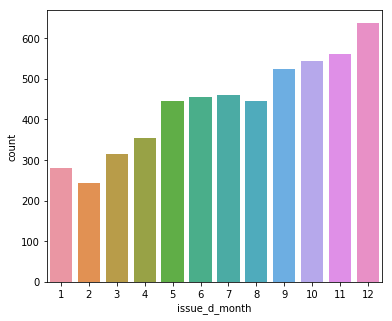

In [461]:
display_func('issue_d_month' , 6)

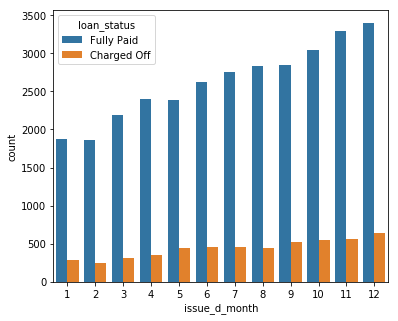

In [462]:
plot_func('issue_d_month' , 6)

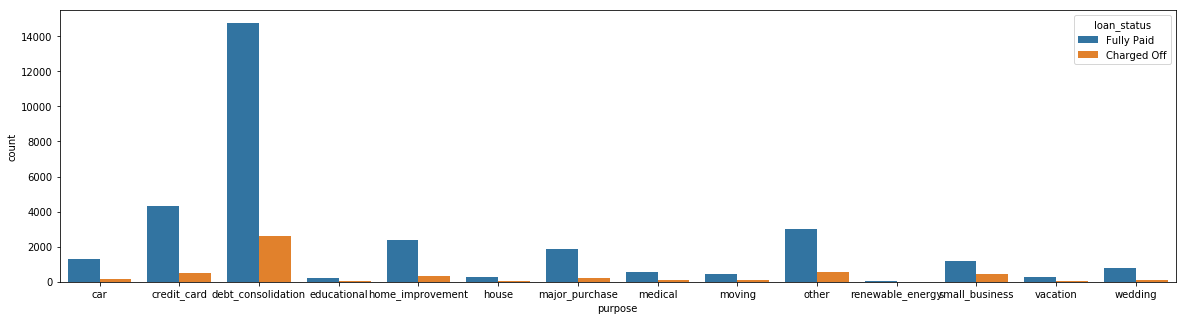

In [463]:
plot_func('purpose', 20)

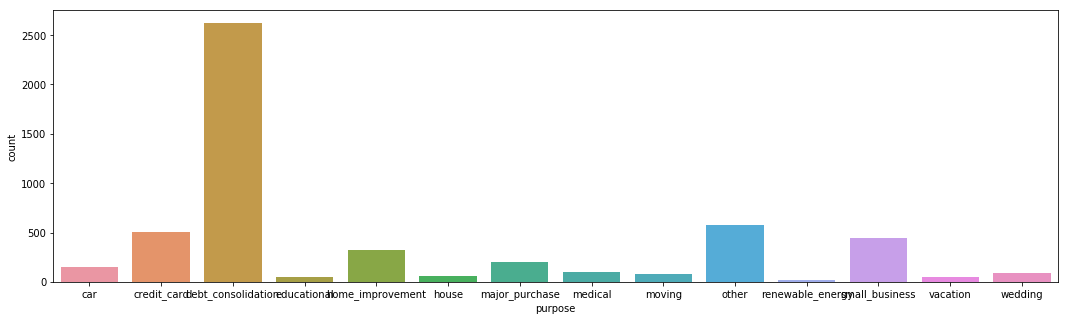

In [464]:
display_func('purpose', 18)

In [465]:
loan.groupby('purpose')['loan_status'].value_counts().sort_values()

purpose             loan_status
renewable_energy    Charged Off       18
educational         Charged Off       49
vacation            Charged Off       50
house               Charged Off       58
renewable_energy    Fully Paid        76
moving              Charged Off       81
wedding             Charged Off       89
medical             Charged Off       99
car                 Charged Off      151
major_purchase      Charged Off      206
educational         Fully Paid       245
house               Fully Paid       291
vacation            Fully Paid       291
home_improvement    Charged Off      319
small_business      Charged Off      444
moving              Fully Paid       460
credit_card         Charged Off      501
medical             Fully Paid       546
other               Charged Off      578
wedding             Fully Paid       804
small_business      Fully Paid      1211
car                 Fully Paid      1278
major_purchase      Fully Paid      1848
home_improvement    Fully

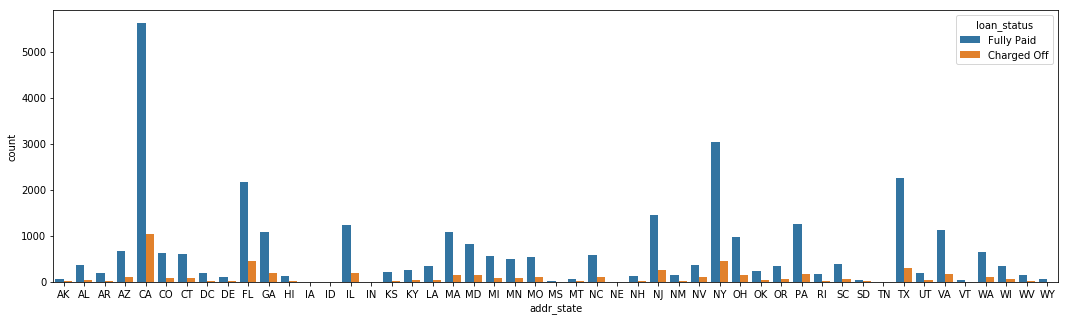

In [466]:
plot_func('addr_state',18)

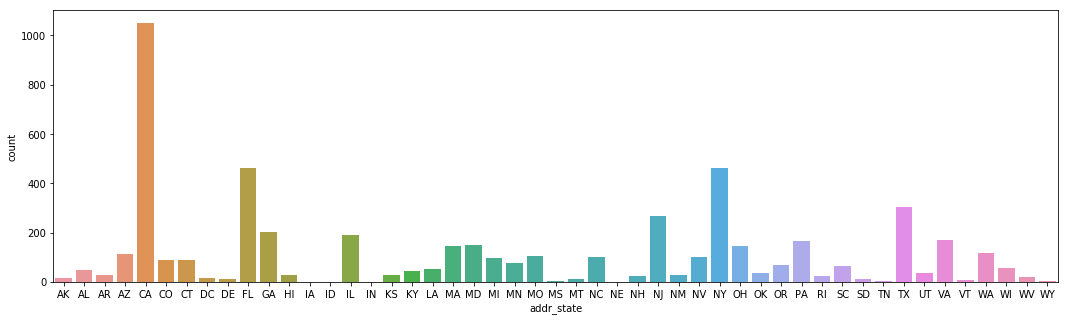

In [467]:
display_func('addr_state' , 18)

In [468]:
loan.groupby('addr_state')['loan_status'].value_counts().loc[:,'Charged Off'].sort_values()

addr_state
TN       2
MS       2
WY       3
VT       6
MT      10
SD      11
DE      11
DC      14
AK      15
WV      21
NH      23
RI      25
KS      26
AR      26
HI      28
NM      29
UT      37
OK      38
KY      45
AL      50
LA      52
WI      58
SC      64
OR      68
MN      76
CT      87
CO      87
MI      95
NV     101
NC     103
MO     105
AZ     113
WA     116
OH     144
MA     147
MD     151
PA     167
VA     170
IL     191
GA     202
NJ     269
TX     303
FL     462
NY     462
CA    1050
Name: loan_status, dtype: int64

There's does not appear to be a significant difference.

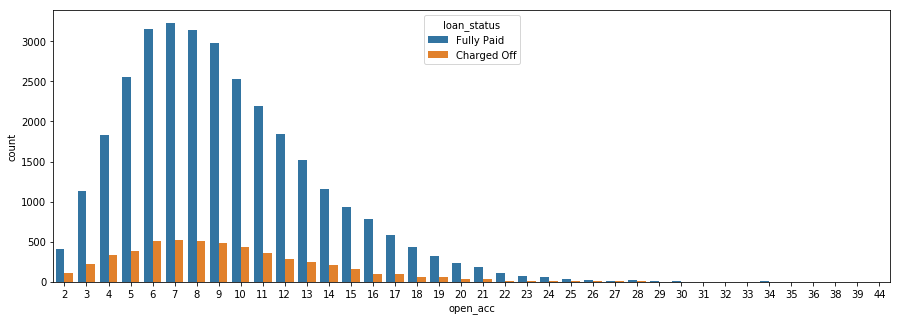

In [469]:
plot_func('open_acc', 15)

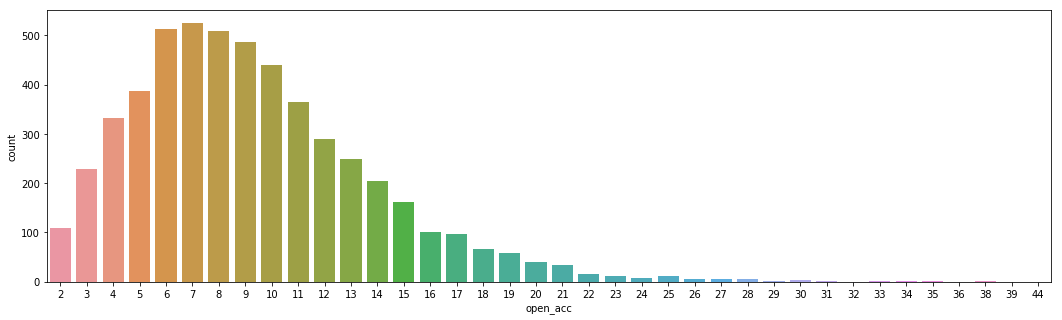

In [470]:
display_func('open_acc', 18)

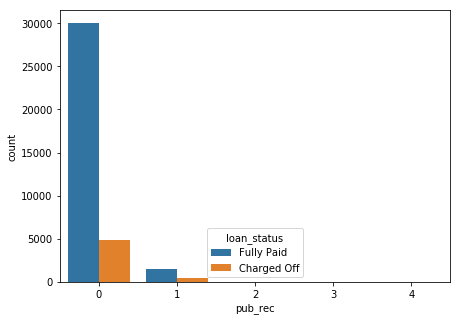

In [471]:
plot_func('pub_rec', 7)

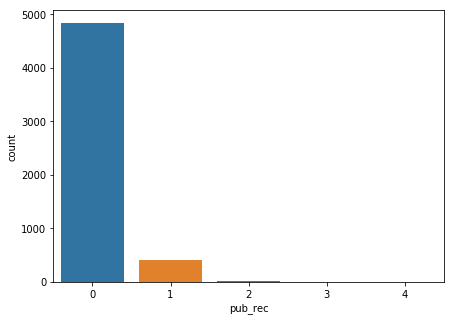

In [472]:
display_func('pub_rec',7)

loans that are charged off tend to have higher debt-to-income(dti) ratios.

In [473]:
loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,14.030047,6.559134,0.0,9.13,14.34,19.29,29.85
Fully Paid,31525.0,13.219124,6.658056,0.0,8.07,13.26,18.45,29.99


In [474]:
# Create derived variable for dti(debt to income ratio)
def dti(n):
    if n <= 5:
        return 'low'
    elif n > 5 and n <=10:
        return 'medium'
    elif n > 10 and n <=15:
        return 'high'
    else:
        return 'very high'
   

In [475]:
loan['dti'] = loan['dti'].apply(lambda x: dti(x))

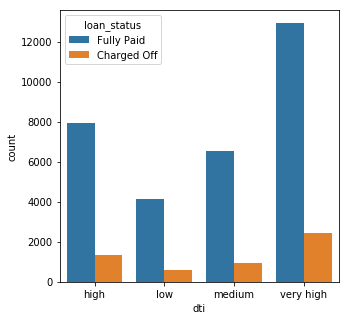

In [476]:
plot_func('dti', 5)

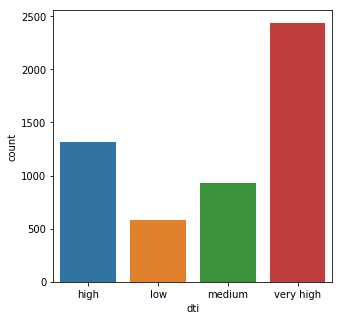

In [477]:
display_func('dti', 5)

revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Charged Off seems to have more revol_util.

In [478]:
#Get the int_rate value from field int_rate 
loan['revol_util']=loan['revol_util'].apply(lambda x : x.split('%')[0])
loan['revol_util'] = loan['revol_util'].astype('float64')

In [479]:
loan.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,55.920838,27.817895,0.0,34.9,59.0,79.2,99.9
Fully Paid,31525.0,47.836585,28.228597,0.0,24.3,48.0,71.1,99.9


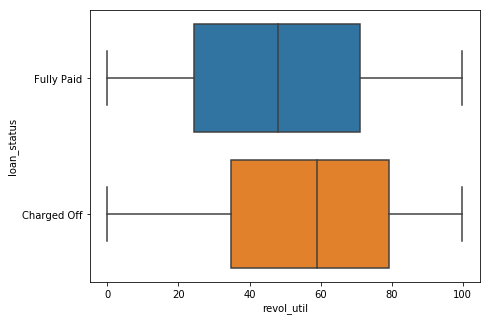

In [480]:
boxplot_func('revol_util', 7)

revol_bal : Total credit revolving balance
Probability of revol bal is significant more in Charged Off

In [481]:
loan.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,13646.990693,15119.732800,0.0,4112.0,9380.0,17663.0,147365.0
Fully Paid,31525.0,13330.890912,15968.410153,0.0,3667.0,8799.0,16916.0,149588.0


total_acc : The total number of credit lines currently in the borrower's credit file
No large differences here.

In [482]:
loan.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,21.585375,11.461876,2.0,13.0,20.0,29.0,74.0
Fully Paid,31525.0,22.248025,11.396394,3.0,14.0,21.0,29.0,90.0


In [483]:
loan.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,0.064387,0.247008,0.0,0.0,0.0,0.0,2.0
Fully Paid,31525.0,0.038065,0.191853,0.0,0.0,0.0,0.0,2.0


pub_rec_bankruptcies: Number of public record bankruptcies does not have any significance

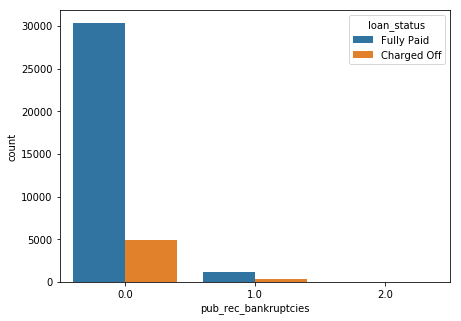

In [484]:
plot_func('pub_rec_bankruptcies', 7)

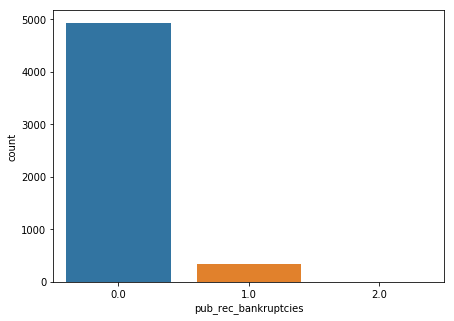

In [485]:
display_func('pub_rec_bankruptcies', 7)

<b>loan_amnt</b> : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
Charged off are shifted towards higher average loan amount request.


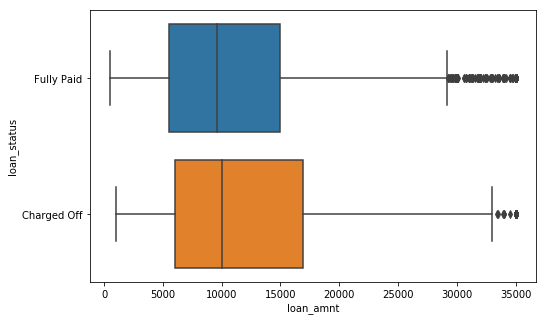

In [486]:
boxplot_func('loan_amnt',8 )

In [487]:
loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5265.0,12253.779677,8102.023156,1000.0,6000.0,10000.0,16950.0,35000.0
Fully Paid,31525.0,10965.614592,7224.125820,500.0,5500.0,9600.0,15000.0,35000.0


emp_length:Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [488]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [489]:
emp_length_dict = {'< 1 year' : 0, '1 year' : 1, '2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,'6 years' : 6, 
                   '7 years' : 7,'8 years' : 8,'9 years' : 9, '10+ years' : 10}
loan = loan.replace({"emp_length": emp_length_dict })


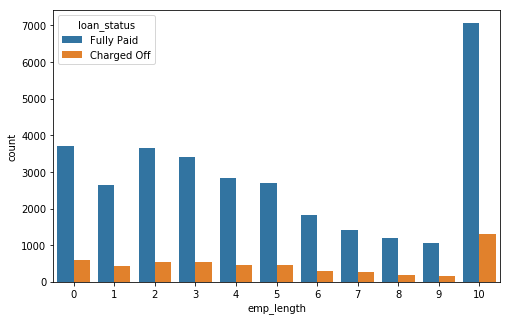

In [490]:
plot_func('emp_length', 8)

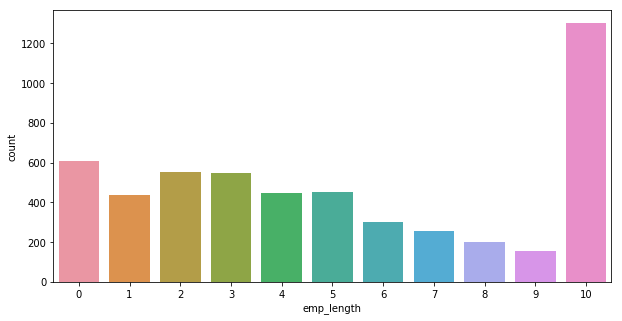

In [491]:
display_func('emp_length',10)

In [492]:
#Create Derived categorical variable
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'],
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

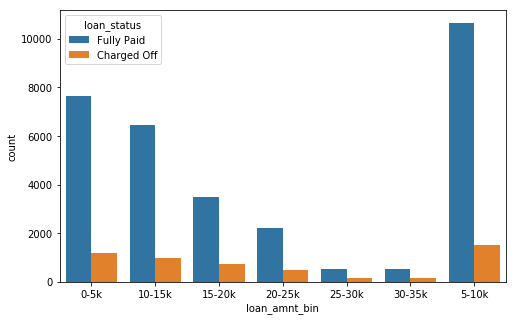

In [493]:
plot_func('loan_amnt_bin',8)

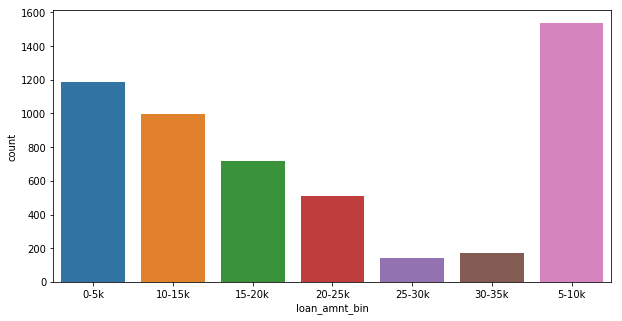

In [494]:
display_func('loan_amnt_bin',10)

# Bivariate Analysis

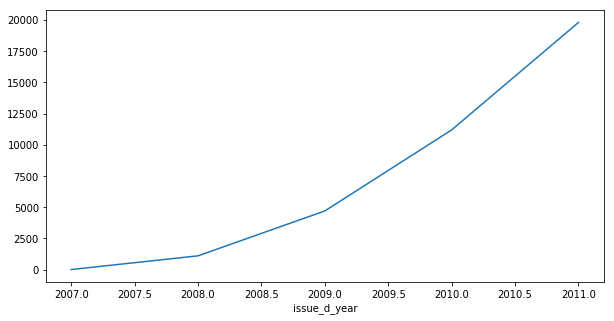

In [495]:
plt.figure(figsize=(10,5))
loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line')
plt.show()

Borrowers are charged more interest rate as the grade of loan goes from A to G.

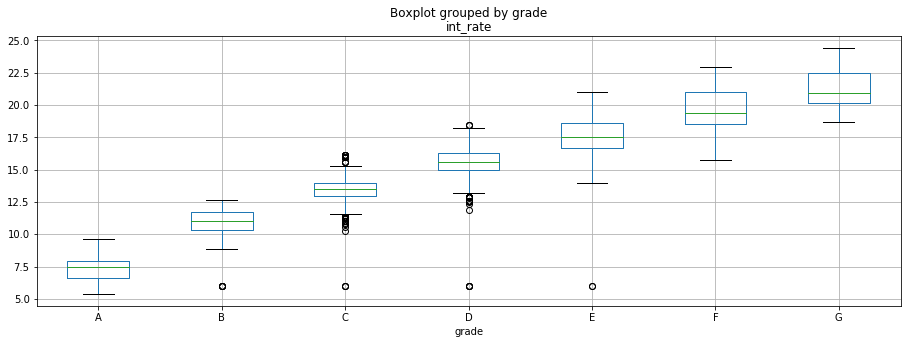

In [496]:
loan.boxplot(column='int_rate', by='grade' , figsize=(15,5))
plt.show()

Higher loan amount are associated with lower grade for longer terms.

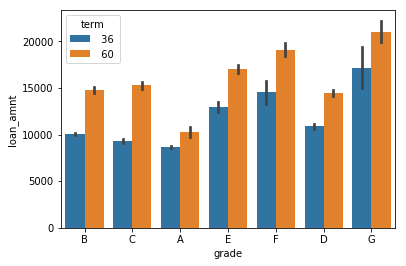

In [497]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan, estimator=np.mean)
plt.show()

Higher loan amount are associated with longer terms and see higher Charge Offs.

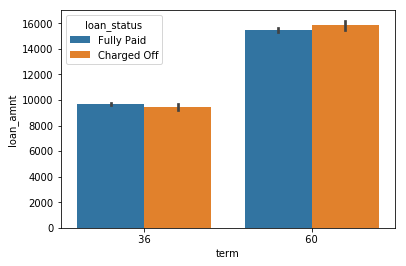

In [498]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

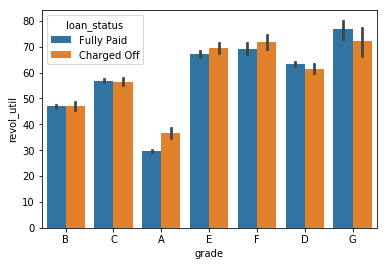

In [499]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

Interest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of interest for the loan.

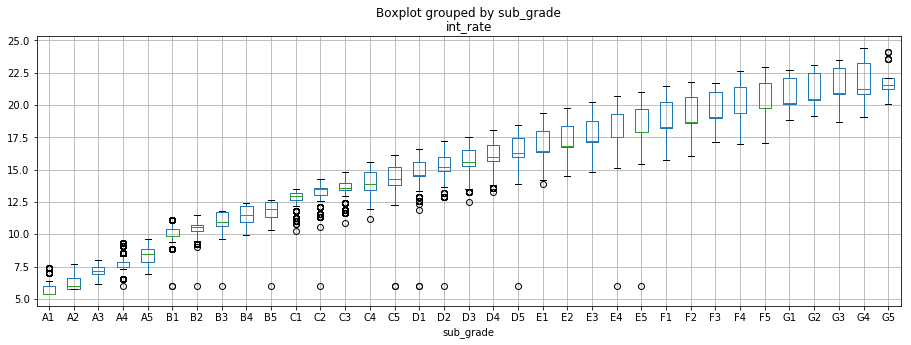

In [500]:
loan.boxplot(column='int_rate', by='sub_grade' , figsize=(15,5))
plt.show()

Interest rates varies directly with the Grades. Larger or worst the grade, higher are the rate of interest for the loan.

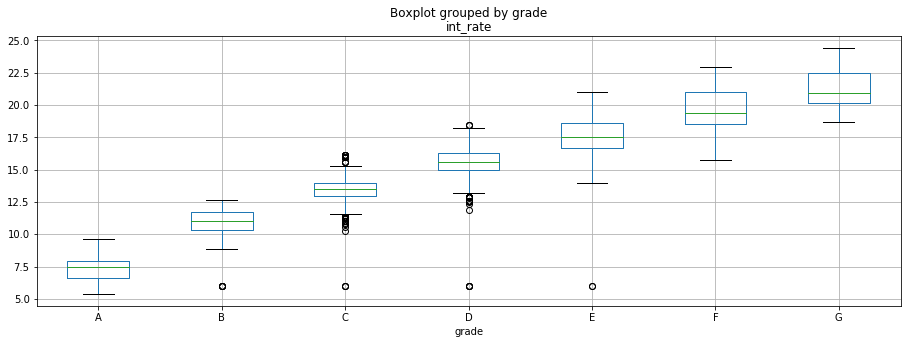

In [501]:
loan.boxplot(column='int_rate', by='grade' , figsize=(15,5))
plt.show()

Interest rates are based on term. More the amount higher is the term.

<Figure size 720x360 with 0 Axes>

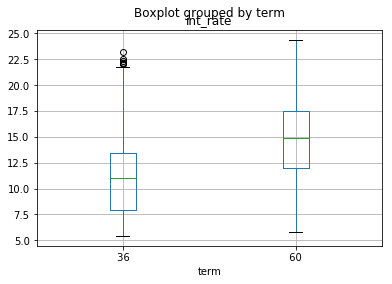

In [502]:
plt.figure(figsize=(10,5))
loan.boxplot(column='int_rate', by='term')
plt.show()

Higher loan amounts are Verified and more in numbers for charged off. 

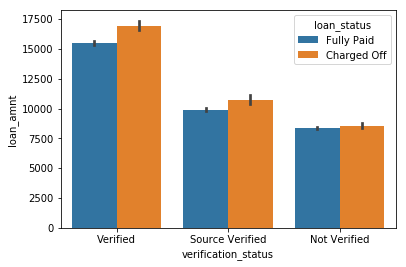

In [503]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

<Figure size 720x504 with 0 Axes>

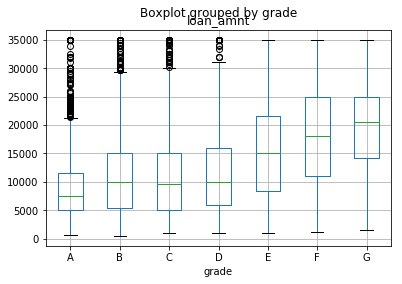

In [504]:
plt.figure(figsize=(10,7))
loan.boxplot(column='loan_amnt', by='grade')
plt.show()

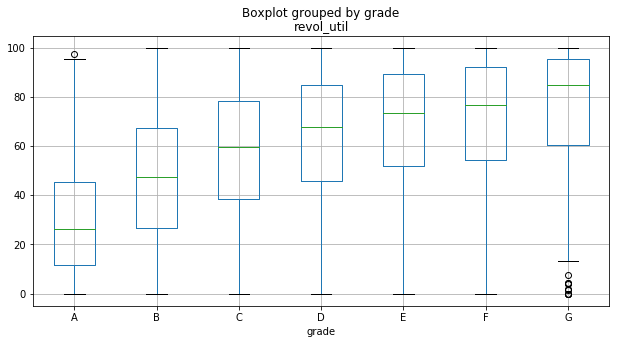

In [505]:
loan.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [506]:
loan.corr()['loan_amnt'] 

loan_amnt               1.000000
int_rate                0.299827
installment             0.931186
emp_length              0.148642
open_acc                0.174512
pub_rec                -0.047179
revol_bal               0.315989
revol_util              0.060821
total_acc               0.255633
pub_rec_bankruptcies   -0.031921
issue_d_month           0.053239
issue_d_year            0.115426
Name: loan_amnt, dtype: float64

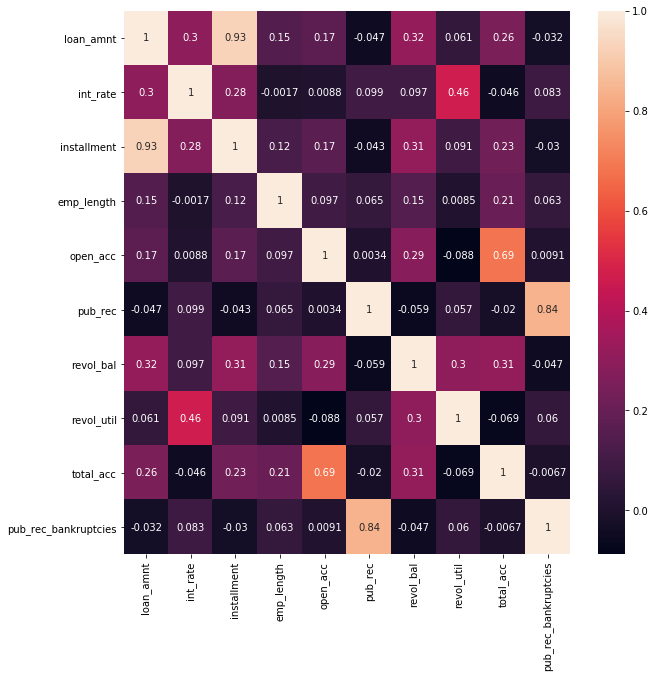

In [507]:
plt.figure(figsize=(10,10))
corr_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
        'total_acc', 'pub_rec_bankruptcies']
sns.heatmap(loan[corr_var].corr(), annot=True)